# Assignmnet 1 (100 points)

**Name:** Dev Bhanushali<br>
**Email:** deb3962@thi.de<br>
**Group:** A <br>
**Hours spend *(optional)* : 20+ Hrs** <br>

### Question 1: Zipf’s law *(20 points)*

<p>Verify Zipf’s law on a textual corpus. The jungle book dataset is provided in the "Datasets and Resources" file. (You can also use any other dataset of your choice). <p>

<p> Provide a list of unique word sorted by their frequency in descending order. Also, give a brief discussion of the findings. You can use matplotlib library to plot the linear curve, and a log-log curve. The usage of other python modules is not permitted.</p>

imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import re
import math

data cleaning and simple tokenization

In [287]:
data = None
with open("./Datasets and resources/jungle_book.txt", "r") as handle:
    data = handle.read()

# replace all characters with spaces except spaces and alphabets
data = re.sub(r'[^a-zA-Z\s]', '', data)
while("\n" in data): data = data.replace("\n", " ")
data = data.split()

# small check to make sure all words contain only alphabets
outliers = 0
for i in data:
    if(not(i.isalpha())):
        outliers += 1
        print(i)

print("All words contain only alphabets") if outliers == 0 else print(f"{outliers} words are cleaned incorrectly")

All words contain only alphabets


extracting word frequencies and rank data

In [288]:
# find frequencies and ranks of words
freq = {}

for i in data:
    if(i in freq.keys()):
        freq[i] = freq[i] + 1
    else:
        freq[i] = 1


values = list(freq.values())
values.sort(reverse=True)
ranks = np.array(range(len(values)))

# logbase10 transformation to both word-rank and frequencies
log_values = np.log10(values)
log_ranks = np.log10(ranks)

# train x and y for regression curve fitting
x = log_ranks.reshape(-1, 1)
y = log_values

# filter out data that can not be represented in float64 form
finite_indices = np.where(np.isfinite(x) & np.isfinite(y))[0]
x, y = x[finite_indices], y[finite_indices]

# fit a regression line and check for negative slope and resemblance with the plotted log-frequency vs log-rank relation to verify zipfs law
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)

C:\Users\devbh\AppData\Local\Temp\ipykernel_22852\6361383.py:17: RuntimeWarning: divide by zero encountered in log10
  log_ranks = np.log10(ranks)


In [289]:
len(values)

6454

log-log plot of word rank vs frequency plot

Slope of fitted regression line: -1.1064664118770193


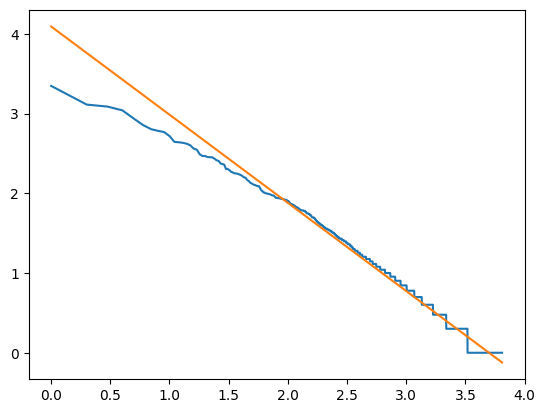

In [ ]:
plt.plot(log_ranks, log_values)
plt.plot(x, y_pred)

print(f"Slope of fitted regression line: {model.coef_[0]}")

This plot depicts a roughly linear relation between log-frequency and log-rank with a negative slope. With this we have confirmed zipfs law.

### Question 2: Mutual Information *(30 points)*

Pointwise mutual information quantifies the statistical dependence between events ${x_{t} = w_{1} }$ and ${ x_{t+1} = w_{2}}$. ${C(w)}$ is the absolute frequency and ${N}$ is the size of the corpus. If the probability of the next word in the corpus (${w_{2}}$) is affected by the probability of the previous word (${w_{1}}$), then ${pmi(w_{1},w_{2}) = 0}$; else the pmi value is either positive or negative.

$$ pmi(w_{1},w_{2}) = log \frac{P(x_{t} = w_{1}, x_{t+1} = w_{2})} {P(x_{t} = w_{1}) . P(x_{t+1} = w_{2})} \approx log \frac {C(w_{1}w_{2}) . N} {C(w_{1}) . C(w_{2})}  $$

<p>Calculate the Pointwise mutual information (PMI) for all successive word pairs (w1, w2) in the jungle book corpus. Words (not word pairs) that occur in the corpus less than 10 times should be ignored. List the 30 word pairs with the highest pmi value and the 30 word pairs with the lowest pmi value. Document your observations and discuss the validity of the independence assumption for unigram models. If needed, you can use nltk library. </p>

In [2]:
data = None
with open("./Datasets and resources/jungle_book.txt", "r") as handle:
    data = handle.read()

# replace all characters with spaces except spaces, alphabets, commas and fullstops
data = re.sub(r'[^a-zA-Z\s.]', '', data)
while("\n" in data): data = data.replace("\n", " ")
# data = data.replace(",", ".")
data = data.lower()
data = data.split(".")

count tokens and store bigram pairs

In [3]:
import nltk
nltk.download('punkt')
token_freq = {}
bigram_pairs = []
for i in data:
    tokens = nltk.word_tokenize(i)

    # count tokens
    for i in tokens:
        if(i not in token_freq.keys()):
            token_freq[i] = 1
        else:
            token_freq[i] = token_freq[i] + 1

    # store bigram token pairs
    bigram_pairs.extend([pair for pair in nltk.bigrams(tokens)])

# pairs_merged = np.array(pairs_merged)

print(f"Number of tokens: {len(token_freq.keys())}")
print(f"Number of bigram pairs: {len(bigram_pairs)}")

Number of tokens: 5601
Number of bigram pairs: 52271


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\devbh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


remove tokens with freq less than 10

In [4]:
tokens = list(token_freq.keys())
for i in tokens:
    if(token_freq[i] < 10):
        del token_freq[i]

print(f"Number of tokens after cleaning: {len(token_freq.keys())}")
tokens = list(token_freq.keys())

cleaned_bigram_pairs = []
for i in bigram_pairs:
    if(i[0] in tokens and i[1] in tokens):
        cleaned_bigram_pairs.append(i)

print(f"Number of bigram pairs after cleaning: {len(cleaned_bigram_pairs)}")
print(f"Number of unique bigram pairs after cleaning: {len(set(cleaned_bigram_pairs))}")

Number of tokens after cleaning: 699
Number of bigram pairs after cleaning: 33869
Number of unique bigram pairs after cleaning: 12877


In [10]:
N = len(token_freq.keys()) # number of indivisual tokens
unique_pairs = list(set(cleaned_bigram_pairs))

pmi_info = {}

for i in unique_pairs:
    c_w1_w2 = cleaned_bigram_pairs.count(i)
    c_w1 = token_freq[i[0]]
    c_w2 = token_freq[i[1]]

    pmi_info[i] = math.log((c_w1_w2 * N) / (c_w1 * c_w2))


In [11]:
sorted_pmi_info = []
for i in pmi_info.keys():
    sorted_pmi_info.append([i, pmi_info[i]])

sorted_pwi_info = sorted(sorted_pmi_info, key=lambda x: x[1])

In [12]:
print("30 Word Pairs with lowest PMI")
for _pair, _pmi in sorted_pwi_info[:30]:
    print(_pair, _pmi)

30 Word Pairs with lowest PMI
('and', 'and') -8.949856070315064
('he', 'the') -8.644771491771632
('of', 'of') -7.861619610586918
('of', 'he') -7.635129709245364
('it', 'the') -7.618869550990606
('they', 'the') -7.603162421785248
('i', 'and') -7.575127483868723
('to', 'he') -7.569947575936158
('was', 'and') -7.480498503000821
('for', 'and') -7.337829718126861
('had', 'the') -7.332052904815254
('and', 'is') -7.331329153523767
('is', 'and') -7.331329153523767
('of', 'and') -7.307125551782881
('and', 'of') -7.307125551782881
('with', 'and') -7.266210754144375
('of', 'in') -7.265333677343934
('he', 'in') -7.0388437760023805
('but', 'and') -7.00824515402107
('that', 'and') -7.006742524136536
('to', 'i') -6.965827120695445
('at', 'and') -6.9652937668254715
('i', 'the') -6.942038747862808
('one', 'the') -6.917899644749451
('we', 'the') -6.891372890416023
('were', 'the') -6.84177594927665
('of', 'for') -6.793711488262788
('he', 'and') -6.792953577989546
('this', 'the') -6.78959019610608
('is', 

In [13]:
print("30 Word Pairs with highest PMI")
for _pair, _pmi in sorted_pwi_info[-30:]:
    print(_pair, _pmi)

30 Word Pairs with highest PMI
('front', 'flippers') 2.136852448893175
('brown', 'baby') 2.1676241075599285
('copyright', 'laws') 2.1676241075599285
('villagers', 'lived') 2.1929419155442185
('within', 'days') 2.2355015299630145
('brown', 'bear') 2.23661697904688
('mothers', 'heart') 2.254635484549558
('wolfs', 'cave') 2.254635484549558
('moon', 'rose') 2.3499456643538834
('black', 'panther') 2.3583139140244
('council', 'rock') 2.359996000207385
('mans', 'cub') 2.4613852260880917
('bring', 'news') 2.477779035863768
('years', 'ago') 2.4961281745319646
('master', 'words') 2.524299051498661
('hind', 'flippers') 2.5423175570013394
('electronic', 'works') 2.560666695669536
('whole', 'line') 2.573089215668093
('twenty', 'yoke') 2.704836486499114
('fore', 'paws') 2.765461108315549
('hind', 'legs') 2.843071711020473
('petersen', 'sahib') 2.985644618001282
('gutenberg', 'literary') 2.9943026807443966
('stretched', 'myself') 3.0430928449138284
('cold', 'lairs') 3.302604040398913
('archive', 'fou

#### **Observations**

we see that word pairs such as ('literary', 'archive') have positive pmi values which indicate that they occur more likely together than expected randomly. In a similar fashion, word pairs such as ('of', 'for') occur in repititive combinations with other such words. They have negative pmi values.

we can use PMI values to estimate the independency between words in ngram models

### Question 3: Wikipedia language model *(50 points)*

<p> A customer of yours is dissatisfied with the quality of the speech recognition. After a conversation with the customer, you find out that he dictates books. The initial investigations on a book excerpt have shown that the language model used is not suitable. For building a better language model for the application, you have asked your customer to provide a text from the book (see "Datasets and Resources") </p>

<p> In order to save costs and also to avoid problems with copyrights, your company has decided not to use existing solutions for this project. So, you have to implement a 2-gram language model in Python from scratch. Include a short description of the data preprocessing steps, method, experiment design, hyper-parameters, and evaluation metric. Also, document your findings, drawbacks, and potential improvements. Finally, compare the performance of the language model with and without Backoff.</p>

<p> You cannot use any Python libraries like NLTK. If you need to use special Python modules, you can discuss with your instructor before submission. </p>

<h4> Datasets and Resources </h4> 

* WikiText-2 (raw/unprocessed), Train, Dev, Test

#### Imports

In [825]:
import numpy as np
import collections
import re
import math

**Data Preprocessing**: Text data is filtered using regex such that only alphabets, spaces and fullstops are left out. New line (\n) characters are replaced with spaces

#### NGram Language Model

In [826]:
class NGramLM:

    """
    ==========================
    === Instance Variables ===
    ==========================
    """
    # stores arrays of word, each subarray represents lines
    preprocesed_lines = []
    # contains vocabulary
    vocabulary = np.array([])
    # contains ngrams of all orders from 1 to n
    n_gram_distributions = []
    # max ngram value specified
    max_ngram_order = None

    path = None
    
    
    """
        ===================
        === constructor ===
        ===================

        loads data from file
        tokenizes data read from file
        generates ngram data from line-wise tokenized words
        extracts vocabulary using tokens in unigram
    """
    def __init__(self, path, max_n_grams) -> None:
        self.max_ngram_order = max_n_grams
        self.path = path
        self.preprocesed_lines = self.preprocressContent(path)

        # extract ngrams for all orders from 1 to max_ngram_order
        for i in range(self.max_ngram_order, 0, -1):
            n_grams = self.computeNGrams(self.preprocesed_lines, i)
            self.n_gram_distributions.append(n_grams)
        
        # calculates the vocabulary based off unigram data
        self.vocabulary = np.array([(key[0], int(value)) for key, value in self.n_gram_distributions[-1].items()])
    


    """
        =====================
        === preprocessing ===
        =====================

        preprocess text and splits it into lines
        so we can extract ngram tokens from it
    """
    def preprocressContent(self, path: str) -> list:
        data = None
        with open(path, "rb") as handle:
            data = handle.read()
        text_content = data.decode('utf-8')

        # replace all characters with spaces except spaces, alphabets, commas and fullstops
        text_content = re.sub(r'[^a-zA-Z\s.]', '', text_content)
        while("\n" in text_content): text_content = text_content.replace("\n", " ")

        # split sentences so ngrams only have context from the same sentence
        # and do not include words from previous sentences
        text_content = text_content.lower()
        lines = text_content.split(".")

        return lines
    
    
    
    """
        ========================
        === NGram Generation ===
        ========================

        computes all ngrams from the highest order n to 1
        and stores it for the backoff feature
    """
    def computeNGrams(self, lines: list, n: int) -> list:
        n_grams = []
        for line in lines:
            words = line.split()
            n_grams.extend([tuple(words[i:i+n]) for i in range(len(words) - (n-1))])
        
        n_gram_token_freq = collections.Counter(n_grams)

        return n_gram_token_freq
    


    """
        ========================
        === NGram Getter ===
        ========================

        returns ngrams of a specific order
    """
    def getNGrams(self, order: int):
        if(0 < order <= len(self.n_gram_distributions)):
            return self.n_gram_distributions[-order]
        else:
            print("invalid ngram order")


    """
        =====================================================
        === NGram Probability Mass Distribution Generator ===
        =====================================================

        returns probability distribution of nth order ngrams
        and its cumulative probability density
    """
    def SmoothedDist(self, order: int) -> list:
        if(order > self.max_ngram_order):
            print("Invalid NGram order")
            return

        dist = self.n_gram_distributions[self.max_ngram_order - order]
        dist_lower = self.n_gram_distributions[self.max_ngram_order - order + 1] if order > 1 else None
        V = len(list(dist_lower)) if order > 1 else sum([int(x[1]) for x in self.vocabulary])
        prob_dist = {}
        for ngram, freq in list(dist.items()):
            history, word = ngram[:-1], ngram[-1]
            num = freq + 1  # Laplace smoothing
            den = dist_lower.get(history, 0) + V if dist_lower else V
            
            # if backoff and (num < 3 or den == 0):
            #     # print("backoff calculation")
            #     num = dist_lower.get(ngram[1:], 0) + 1 if dist_lower else 1
            #     den = V
            
            prob_dist[ngram] = num / den
        return prob_dist, sum(prob_dist.values())


**Method**: Probability Distributions are computed and smoothened using Laplace smoothing in the **SmoothedDist** method.
Test data from the test file is pre-processed in the same manner as the train data, except we want just words and not ngrams.

In [827]:
lm_train = NGramLM("./Datasets and resources/wikitext-2-raw-v1/wikitext-2-raw/wiki.train.raw", 5)
lm_test = NGramLM("./Datasets and resources/wikitext-2-raw-v1/wikitext-2-raw/wiki.test.raw", 2)

In [828]:
UnigramDist = lm_train.SmoothedDist(order=1)[0]
BigramDist = lm_train.SmoothedDist(order=2)[0]

**Hyper Parameters**

1) Order of NGram
2) Alpha (backoff weight [0 to 1]) - Lesser the weight, lower the importance given to lower order ngram predictions

**Evaulation Metric**

$$\text{Perplexity} = \exp\left(-\frac{\sum_{i=1}^{N-1} \log P(w_{i+1}|w_i)}{N-1}\right)$$

$$\text{Perplexity With Backoff} = \exp\left(-\frac{\sum_{i=1}^{N-1} \log P_{\text{backoff}}(w_{i+1}|w_i)}{N-1}\right)$$


In [835]:
# load word sequences from test file
with open("./Datasets and resources/wikitext-2-raw-v1/wikitext-2-raw/wiki.test.raw", "rb") as handle:
    text_content = handle.read().decode('utf-8')
test_data = np.hstack([x.split() for x in text_content.lower().split(".")])

def computeBigramProbDistBackoff(bigramDist, unigramProbDist, alpha):
    V = len(unigramProbDist)
    return {(w1, w2): (f + alpha) / (unigramProbDist.get(w1, 0) + V * alpha) for (w1, w2), f in bigramDist.items()}

def computePerplexity(testData, unigramProbDist, bigramProbDist):
    total_log_probability = 0
    word_count = 0
    V = len(unigramProbDist)

    for i in range(len(testData) - 1):
        history, word = testData[i], testData[i + 1]
        bigram_probability = bigramProbDist.get((history, word), 0)
        if bigram_probability == 0:
            unigram_probability = unigramProbDist.get(word, 1) / V
            total_log_probability += math.log(unigram_probability)
        else:
            total_log_probability += math.log(bigram_probability)

        word_count += 1
    
    perplexity = math.exp(-total_log_probability / word_count)
    return perplexity

def computePerplexityBackoff(testData, unigramProbDist, bigramProbDist):
    total_log_probability = 0
    word_count = 0
    alpha = 0.99
    V = len(unigramProbDist)
    
    for i in range(len(testData) - 1):
        history, word = testData[i], testData[i + 1]
        bigram_probability = bigramProbDist.get((history, word), 0)
        if bigram_probability == 0:
            unigram_probability = unigramProbDist.get(word, 1) / V
            interpolated_prob = alpha * unigram_probability
            total_log_probability += math.log(interpolated_prob)
        else:
            total_log_probability += math.log(bigram_probability)
        word_count += 1
    
    perplexity = math.exp(-total_log_probability / word_count)
    return perplexity


perplexity = computePerplexity(test_data, UnigramDist, BigramDist)
print("Perplexity without Katz Backoff LM:", perplexity)

backoffBigramProbDist = computeBigramProbDistBackoff(lm_train.n_gram_distributions[lm_train.max_ngram_order - 2], UnigramDist, 0.01)
backoffPerplexity = computePerplexityBackoff(test_data, UnigramDist, backoffBigramProbDist)
print("Perplexity with Katz Backoff LM:", backoffPerplexity)
print(f"Performance Ratio ====> {round(perplexity, 2)} : {round(backoffPerplexity, 2)} ====> {round(perplexity/backoffPerplexity, 2)}" )

Perplexity without Katz Backoff LM: 12997.198680682419
Perplexity with Katz Backoff LM: 1352.4689185452764
Performance Ratio ====> 12997.2 : 1352.47 ====> 9.61


**Performance Comparision**

Perplexity without Katz Backoff LM: 12997.198680682419

Perplexity with Katz Backoff LM: 1352.4689185452764

Performance Ratio ====> 12997.2 : 1352.47 ====> 9.61

**Findings**: Perplexity of Language model without backoff performed 9.61 times worse than when there is a Backoff applied.


**Drawbacks**: Larger the threshold value for ngram frequency under which backoff is supposed to be done, heavier the computation. This method also as is cannot perform very well on topic sensitive predictions.

**Potential Improvements**: Instead of Laplace smoothing, we can use Good Turing Discounting (Which is much more complex) which will do a better job at keeping cumulative probability mass close to 0. Higher order ngrams are also likely to work better.

### Additional Experiments *(5 additional points - <span style="color: red;">Optional</span>)*

small class that tries to predict next token based on probability distribution

In [836]:
class NGramLM:

    preprocesed_lines = []
    vocabulary = np.array([])
    n_gram_distributions = []
    max_ngram_order = None
    
    def __init__(self, path, max_n_grams) -> None:
        max_ngram_order = max_n_grams
        self.preprocesed_lines = self.preprocressContent(path)
        for i in range(max_ngram_order, 0, -1):
            n_grams = self.computeNGrams(self.preprocesed_lines, i)
            self.n_gram_distributions.append(n_grams)
        
        # calculates the vocabulary based off unigram data
        self.vocabulary = np.append(self.vocabulary, np.array([x[0] for x in list(dict(self.n_gram_distributions[-1]).keys())]))
    
    
    # preprocess text and split them into lines so we can extract ngram tokens from them
    def preprocressContent(self, path: str) -> list:
        data = None
        with open(path, "rb") as handle:
            data = handle.read()
        text_content = data.decode('utf-8')

        # replace all characters with spaces except spaces, alphabets, commas and fullstops
        text_content = re.sub(r'[^a-zA-Z\s.]', '', text_content)
        while("\n" in text_content): text_content = text_content.replace("\n", " ")

        # split sentences so ngrams only have context from the same sentence
        # and do not include words from previous sentences
        text_content = text_content.lower()
        lines = text_content.split(".")

        return lines
    
    
    # computes all ngrams from the highest order to the order 1 and stores it for the backoff feature
    def computeNGrams(self, lines: list, n: int) -> list:
        n_grams = []
        for line in lines:
            words = line.split()
            n_grams.extend([tuple(words[i:i+n]) for i in range(len(words) - (n-1))])
        
        n_gram_token_freq = collections.Counter(n_grams)

        return n_gram_token_freq
    
    # returns ngrams of a specific order
    def getNGrams(self, order: int):
        if(0 < order <= len(self.n_gram_distributions)):
            return self.n_gram_distributions[-order]
        else:
            print("invalid ngram order")
    
    # def applyGTDiscount(self, ngrams: dict) -> dict:
    #     sortedNGrams = sorted([[key, ngrams[key]] for key in ngrams.keys()], key= lambda x: x[1], reverse=False)
    #     return (sortedNGrams)
    
    def preprocessTestInput(self, history: str):
        # preprocess input
        history = re.sub(r'[^a-zA-Z\s.]', '', history)
        while("\n" in history): history = history.replace("\n", " ")
        history = history.lower()
        history = history.split(".")

        if(len(history[-1]) > self.max_ngram_order):
            history = history[-1][::-1][:self.max_ngram_order]
        else:
            history = history[-1]
        
    # predicts next token given a history using backoff (recursive)
    def predict_token(self, history: list) -> str:
        # calculate probability for all words in the vocabulary

        prob_dist = {}

        for i, word in enumerate(self.vocabulary[350:400]):
            if(i % 10 == 0): print(i)
            prob = 0
            for model_order in self.n_gram_distributions:
                order = len(list(model_order.keys())[0])
                c_word = sum([model_order[key] for key in model_order.keys() if list(key) == history + list(word)])
                if(c_word > 0):
                    c_history = sum([model_order[key] for key in model_order.keys() if list(key[:order - 1]) == history])
                    prob = c_word / c_history
                    break
            prob_dist[str(word)] = prob
        return prob_dist